## Data Exploration

#### Problem Statement & Background

> ##### High level statement of the problem: 
Ethereum is becoming more and more popular due to it being new and never before seen type of platform. Why is it the first? What is so different? And what can we see from the data?

> ##### Background on the problem:
Cryptocurrencies have been creeping into our everyday lives through many different platforms. Published in 2013, Ethereum is a baby in the world of technology, and has already made such an impact. Overall, we want to understand both Ethereum and Blockchain better than we do right now. To do so, we are going to dive deeply into as many aspects of each as we can. Doing some research and looking at previous analysis, Ethereum is a new and amazing cryptocurrency and Ethereum blockchain is a new, never before seen type of platform.

> ##### Why is the problem interesting?
Developers can develop and deploy applications faster and safter than ever before. Using smart contracts (computer code that can facilitate the exchange of money, content, property, or anything of value), there is no need for censorship, downtime, fraud, or a third party interface. 

> ##### Who is interested?
Everyone should be interested, as it has the ability to bring everyone more content. Developers are especially interested as Ethereum Blockchain gives them an easy platform to develop applications. 

> ##### What is known?
Analysis has been done to find the most popular smart contract event logs, transaction volumes and networks, and smart contract functionality.  

#### Data Source Intend To Use

> ##### Describe the data source:
We are going to use Google BigQuery's dataset called "ethereum_blockchain" in their big-query-public-datasets. This has 7 tables associated with the ethereum_blockchain. These tables include: blocks, contracts, logs, token_transfers, tokens, traces, transactions. Due to my forgetfulness of how to use Google Cloud Platform, we have not been able to explore the data as much as I would have liked. But this data has a lot of values that will be easily used to analyze and come to conclusions. We plan to obtain the data usign GCP. I have been able to run a few queries on the tables and there is a lot of data here, this will make for accurate conclusions. 
Since there are 7 different tables, we will attempt to join as many as we can. Though I do not think there is an identifying number for each transaction in each table, we will try to combine as many as possible. Also, most of the tables have a few columns that are hash values for the transactions resulting in character strings that take a long time to query. By remvoing uneccessary columns, we hope to make the data clearner and more understandable for us.
The BigQuery dataset is loaded every day. I do not believe that it is real time, since there is no data for 9/26/2019 as of 9:00am. I will look more into when the data is uploaded to GCP.

> ##### How much data we have:
We have a lot of data. For the purposes of data exploration, I have pulled the most recent 1000 records from each table in the Google BigQuery dataset.

> ##### Where the data is stored:
The data is stored in Google's BigQuery

> ##### Collect more in the future?
This data is updated every day, so data is always being collected

#### Data Flaws/Weaknesses And Cleaning

> ##### Formatting errors?
This data is very organized, though a lot of the information is hashed or numeric values which makes understanding the data difficult.

> ##### Out-of-range errors?
Through examination using the .describe() function, there were no obvious outliers in the subset of data I used for data exploration.

> ##### Missing fields?
There are no missing fields, though not all columns were required to have information, it does not impact any data analysis that will be done.

> ##### Outliers?
No outliers

#### Basic Data Characteristics

In [58]:
!pip install --upgrade google-cloud-bigquery[pandas]

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Requirement already up-to-date: google-cloud-bigquery[pandas] in /opt/conda/anaconda/lib/python2.7/site-packages (1.20.0)


In [65]:
!gsutil cp gs://data-470-bucket/blocks_25_data.csv blocks_25_data.csv
!gsutil cp gs://data-470-bucket/contracts_25_data.csv contracts_25_data.csv
!gsutil cp gs://data-470-bucket/token_transfers_25_data.csv token_transfers_25_data.csv
!gsutil cp gs://data-470-bucket/tockens_data.csv tockens_data.csv
!gsutil cp gs://data-470-bucket/traces_25_data.csv traces_25_data.csv
!gsutil cp gs://data-470-bucket/transactions_25_data.csv transactions_25_data.csv

Copying gs://data-470-bucket/blocks_25_data.csv...

Operation completed over 1 objects/151.2 KiB.                                    
Copying gs://data-470-bucket/contracts_25_data.csv...

Operation completed over 1 objects/1.5 MiB.                                      
Copying gs://data-470-bucket/token_transfers_25_data.csv...

Operation completed over 1 objects/173.6 KiB.                                    
CommandException: No URLs matched: gs://data-470-bucket/tokens_data.csv
Copying gs://data-470-bucket/traces_25_data.csv...

Operation completed over 1 objects/391.8 KiB.                                    
Copying gs://data-470-bucket/transactions_25_data.csv...

Operation completed over 1 objects/490.9 KiB.                                    


In [72]:
blocks = pd.read_csv("blocks_25_data.csv")
contracts = pd.read_csv("contracts_25_data.csv")
token_trans = pd.read_csv("token_transfers_25_data.csv")
tokens = pd.read_csv("tockens_data.csv")
traces = pd.read_csv("traces_25_data.csv")
trans = pd.read_csv("transactions_25_data.csv")

In [84]:
print("There are NA vals in BLOCKS",blocks.isnull().values.any())
print("There are NA vals in CONTRACTS",contracts.isnull().values.any())
print("There are NA vals in TOKEN_TRANS",token_trans.isnull().values.any())
print("There are NA vals in TOKENS",tokens.isnull().values.any())
print("There are NA vals in TRACES",traces.isnull().values.any())
print("There are NA vals in TRANS",trans.isnull().values.any())

('There are NA vals in BLOCKS', False)
('There are NA vals in CONTRACTS', False)
('There are NA vals in TOKEN_TRANS', False)
('There are NA vals in TOKENS', True)
('There are NA vals in TRACES', True)
('There are NA vals in TRANS', True)


There are no NA values in [blocks, contracts, token_trans] and there are NA values in [tokens, traces, trans]

Using the .describe() function, none of the tables appear to have any outliers in their numeric valued fields. 

In [109]:
blocks.shape

(1000, 9)

In [110]:
contracts.shape

(1000, 6)

In [111]:
token_trans.shape

(1000, 6)

In [112]:
tokens.shape

(1000, 7)

In [113]:
traces.shape

(1000, 17)

In [114]:
trans.shape

(1000, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7aa94e690>]],
      dtype=object)

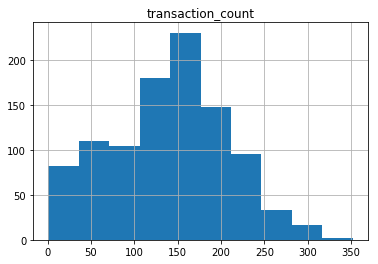

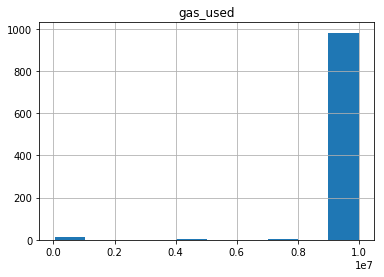

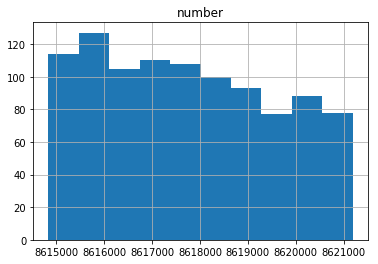

In [119]:
blocks.hist(column='transaction_count')
blocks.hist(column='gas_used')
blocks.hist(column='number')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7aa81bf10>]],
      dtype=object)

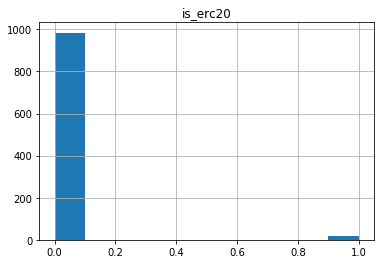

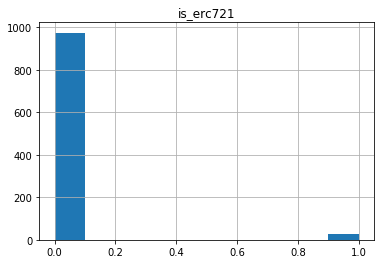

In [121]:
contracts.hist(column='is_erc20')
contracts.hist(column='is_erc721')

In [125]:
tokens.head()

,address,symbol,name,decimals,total_supply,block_timestamp,block_number
0,0xa3bc5b0e66ba8e577e60cc7164eea5ddf6aac2b5,ff18,Fantasy Football Trophy 2018,NaN,1,2019-08-07 18:58:56 UTC,8305266
1,0xbde5d749026049a881e083bf2eb4250117c8dcbe,KCDS,KammerCards,NaN,3,2019-08-07 17:59:25 UTC,8304996
2,0x0e10eec148db706321eb8a4705b4937844b0ec57,BBW,Berlin Blockchain Week,NaN,10,2019-08-07 17:32:53 UTC,8304884
3,0x212c5538406e04e7acc96ac450e1148fae8bf2f6,HAK,DAITAN,0.0,0,2019-08-07 11:03:59 UTC,8303155
4,0x2c81a10029b8822fa76b1f1df75443bdec1e54cb,NaN,NaN,0.0,0,2019-08-07 22:50:22 UTC,8306330


#### Surprises

> ##### What do we expect to see?
I do not intend to see any real outliers in this data. I really do not understand this data and what any of the numeric values represent so I definitely need to learn more in that aspect of what everything is.